In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:/TT lab project screen time analysis EDA/Screentime - App Details.csv')

In [19]:
data.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [20]:
data.tail()

,Date,Usage,Notifications,Times opened,App
49,09/17/2022,212,212,120,Whatsapp
50,09/18/2022,244,303,132,Whatsapp
51,09/19/2022,77,169,105,Whatsapp
52,09/20/2022,58,190,78,Whatsapp
53,09/21/2022,89,262,68,Whatsapp


In [3]:
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

Dataset Shape: (54, 5)

Data Types:
 Date             object
Usage             int64
Notifications     int64
Times opened      int64
App              object
dtype: object

Missing Values:
 Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64


In [4]:
print("\nSummary Statistics:\n", data.describe(include='all'))


Summary Statistics:
               Date       Usage  Notifications  Times opened        App
count           54   54.000000      54.000000     54.000000         54
unique          27         NaN            NaN           NaN          2
top     08/26/2022         NaN            NaN           NaN  Instagram
freq             2         NaN            NaN           NaN         27
mean           NaN   65.037037     117.703704     61.481481        NaN
std            NaN   58.317272      97.017530     43.836635        NaN
min            NaN    1.000000       8.000000      2.000000        NaN
25%            NaN   17.500000      25.750000     23.500000        NaN
50%            NaN   58.500000      99.000000     62.500000        NaN
75%            NaN   90.500000     188.250000     90.000000        NaN
max            NaN  244.000000     405.000000    192.000000        NaN


In [5]:
data.isnull().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

In [6]:
data.corr

<bound method DataFrame.corr of           Date  Usage  Notifications  Times opened        App
0   08/26/2022     38             70            49  Instagram
1   08/27/2022     39             43            48  Instagram
2   08/28/2022     64            231            55  Instagram
3   08/29/2022     14             35            23  Instagram
4   08/30/2022      3             19             5  Instagram
5   08/31/2022     19             25            20  Instagram
6   09/01/2022     44             23            57  Instagram
7   09/02/2022     16             28            22  Instagram
8   09/03/2022     27             15            25  Instagram
9   09/04/2022     72             29            30  Instagram
10  09/05/2022     42             24            51  Instagram
11  09/06/2022     19             34            25  Instagram
12  09/07/2022     38             23            19  Instagram
13  09/08/2022     71             48            43  Instagram
14  09/09/2022     43             68  

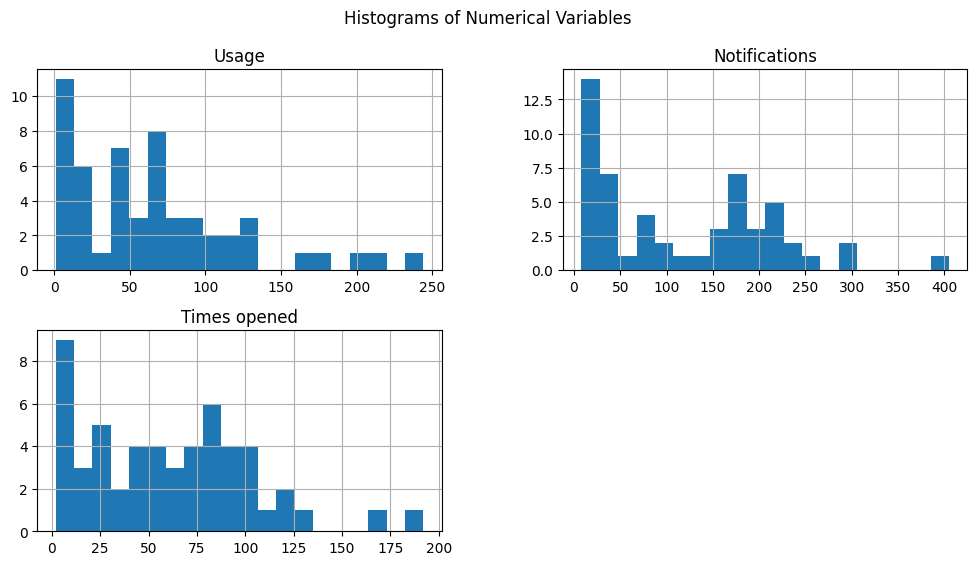

In [7]:
numerical_vars = data.select_dtypes(include=np.number).columns
data[numerical_vars].hist(bins=20, figsize=(12, 6))
plt.suptitle("Histograms of Numerical Variables")
plt.show()

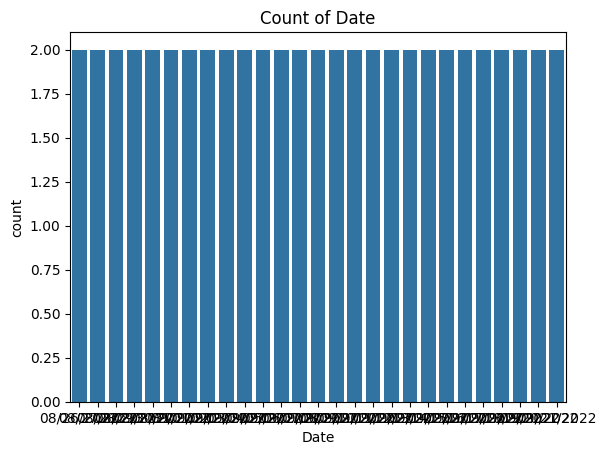

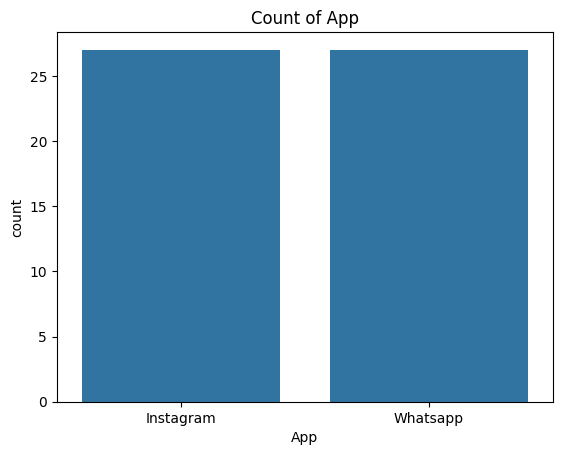

In [8]:
categorical_vars = data.select_dtypes(include='object').columns
for var in categorical_vars:
    sns.countplot(x=var, data=data)
    plt.title(f"Count of {var}")
    plt.show()


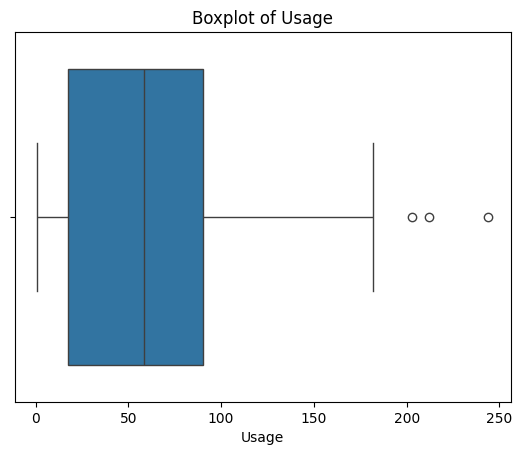

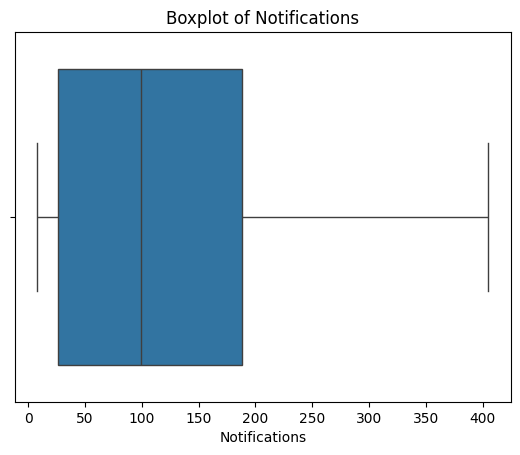

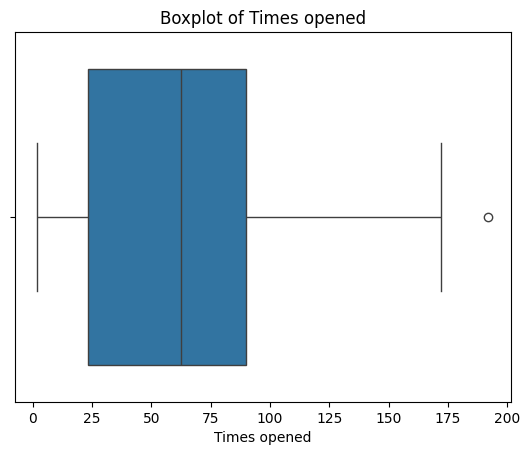

In [9]:
for var in numerical_vars:
    sns.boxplot(x=var, data=data)
    plt.title(f"Boxplot of {var}")
    plt.show()

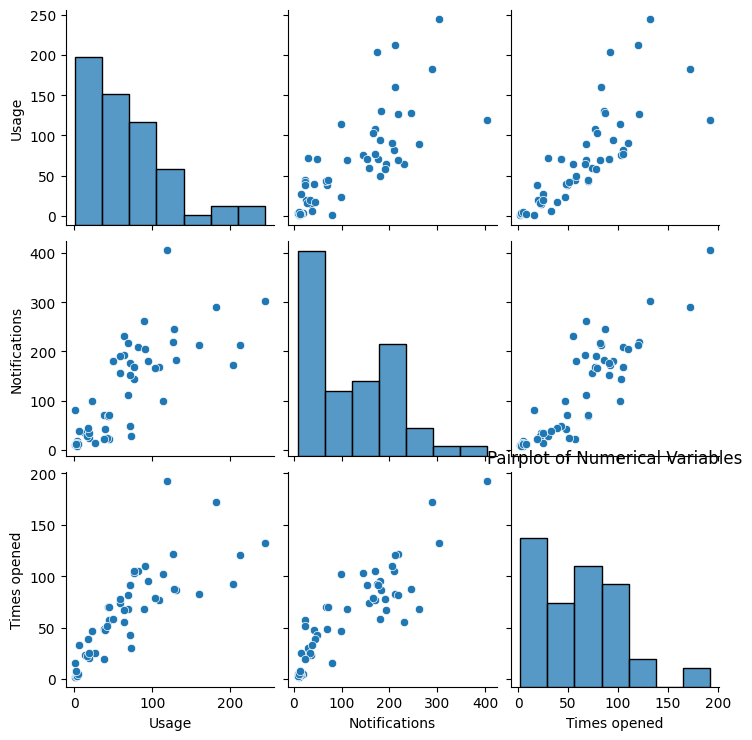

In [10]:
sns.pairplot(data[numerical_vars])
plt.title("Pairplot of Numerical Variables")
plt.show()


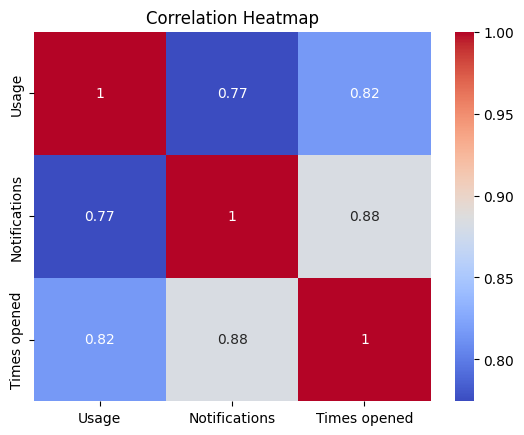

In [12]:
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    data.resample('M').mean().plot(figsize=(12, 6))
    plt.title("Mean Screen Time per Month")
    plt.ylabel("Mean Screen Time")
    plt.show()

int64
Missing values in 'Usage': 0


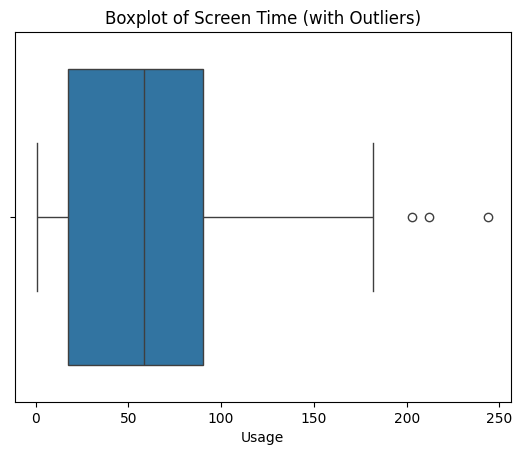

In [17]:
# Check data types of the 'screen_time' column
print(data['Usage'].dtype)

# Convert 'screen_time' column to numeric if necessary
data['Usage'] = pd.to_numeric(data['Usage'], errors='coerce')

# Check for missing values in the 'screen_time' column
print("Missing values in 'Usage':", data['Usage'].isnull().sum())

# Drop rows with missing values in 'screen_time' if needed
data.dropna(subset=['Usage'], inplace=True)

# Plot the boxplot
sns.boxplot(x='Usage', data=data)
plt.title("Boxplot of Screen Time (with Outliers)")
plt.show()


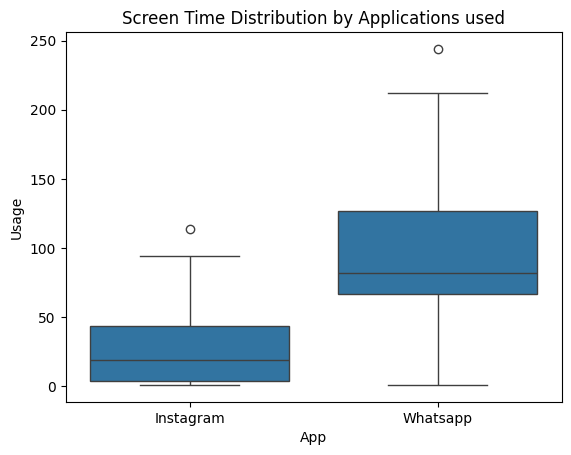

In [18]:
sns.boxplot(x='App', y='Usage', data=data)
plt.title("Screen Time Distribution by Applications used")
plt.show()